In [1]:
# import basic libraries for dataframe usage and viz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
## remove this cell before submitting

os.listdir()

['.ipynb_checkpoints',
 'SMS_Eligible_Did_Not_Receive_SMS.ipynb',
 'sms_eligible_not_receive.csv',
 'SMS_Eligible_No_SMS_Reminder_No_Show',
 'SMS_Eligible_No_SMS_Reminder_Presented']

In [3]:
# this function will greatly simplify getting percentages based on condition
# this can be used as a template if you want to change the equality operator to inequality (>,<, etc..)
def column_percentage_calculator(df, column_name, condition):
    total_rows = df.shape[0]
    num_matched_rows = len(df.loc[(df[column_name] == condition)])
    percentage_matches_condition = (num_matched_rows / total_rows) * 100
    return percentage_matches_condition

# It can be assumed that each row that is in data frame was eligible to receive a SMS reminder as the csv it is based on contains only rows from the original dataset that were eligible to recieve SMS reminders.

In [4]:
sms_eligible_not_receive_df = pd.read_csv('sms_eligible_not_receive.csv')
sms_eligible_not_receive_df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_Between,Day_Num,Age Group,Interval Group
0,M,62,0,0,0,0,0,0,0,22,4,Older Adult and Seniors,2 - 30
1,F,60,0,0,0,0,0,0,0,10,4,Older Adult and Seniors,2 - 30
2,M,28,0,0,0,0,0,0,1,10,4,Young Adult,2 - 30
3,F,69,0,1,0,0,0,0,0,2,4,Older Adult and Seniors,2 - 30
4,M,2,0,0,0,0,0,0,0,10,4,Youth,2 - 30


In [5]:
sms_eligible_not_receive_df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_Between,Day_Num
count,24427.000000,24427.000000,24427.000000,24427.000000,24427.000000,24427.000000,24427.0,24427.000000,24427.000000,24427.000000
mean,37.583862,0.092070,0.200270,0.070086,0.026323,0.016498,0.0,0.327015,16.346952,1.756581
std,23.487795,0.289131,0.400211,0.255298,0.160098,0.127384,0.0,0.469132,15.263206,1.521760
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,12.000000,2.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,23.000000,3.000000
max,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,90.000000,5.000000


In [6]:
sms_eligible_not_receive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24427 entries, 0 to 24426
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          24427 non-null  object
 1   Age             24427 non-null  int64 
 2   Scholarship     24427 non-null  int64 
 3   Hipertension    24427 non-null  int64 
 4   Diabetes        24427 non-null  int64 
 5   Alcoholism      24427 non-null  int64 
 6   Handicap        24427 non-null  int64 
 7   SMS_received    24427 non-null  int64 
 8   No-show         24427 non-null  int64 
 9   Days_Between    24427 non-null  int64 
 10  Day_Num         24427 non-null  int64 
 11  Age Group       24427 non-null  object
 12  Interval Group  24427 non-null  object
dtypes: int64(10), object(3)
memory usage: 2.4+ MB


In [7]:
percent_noshow = column_percentage_calculator(sms_eligible_not_receive_df, 'No-show', 1)
percent_presented = 100 - round(percent_noshow, 2)
print('{}% OF APPOINTMENTS THAT DID NOT RECEIVE A REMINDER WERE NO-SHOW'.format(round(percent_noshow,2)))
print('{}% OF APPOINTMENTS THAT DID NOT RECEIVE A REMINER PRESENTED AT THEIR APPOINTMENT.'.format(percent_presented))

32.7% OF APPOINTMENTS THAT DID NOT RECEIVE A REMINDER WERE NO-SHOW
67.3% OF APPOINTMENTS THAT DID NOT RECEIVE A REMINER PRESENTED AT THEIR APPOINTMENT.


Text(0.5, 1.0, 'No-Show/Presented Binary Distribution')

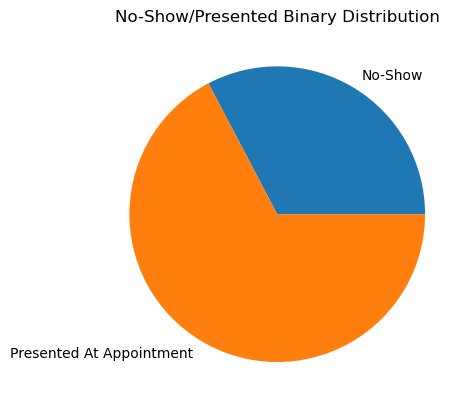

In [8]:
# visualize gender binary distribution
no_show_and_present_percents = [percent_noshow, percent_presented ]
labels = ['No-Show', 'Presented At Appointment']

fig, ax = plt.subplots()
ax.pie(no_show_and_present_percents, labels = labels)
ax.set_title('No-Show/Presented Binary Distribution')

# AGE

<AxesSubplot:ylabel='Frequency'>

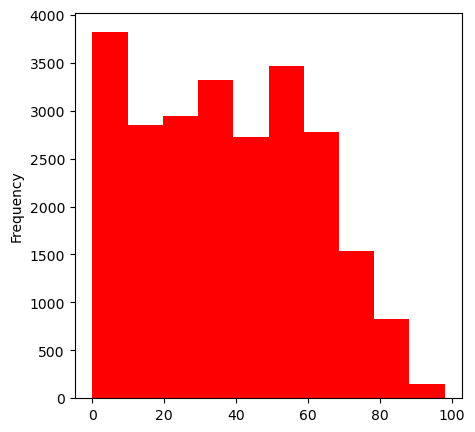

In [9]:
sms_eligible_not_receive_df.Age.plot(kind='hist', figsize=(5,5), color='red')

In [10]:
# calculate the median age for SMS-Eligible appointments that DID NOT RECEIVE SMS REMINDER
age_median = sms_eligible_not_receive_df.Age.median()
print('{} is the median age.'.format(age_median))

37.0 is the median age.


# DAYS_BETWEEN

<AxesSubplot:ylabel='Frequency'>

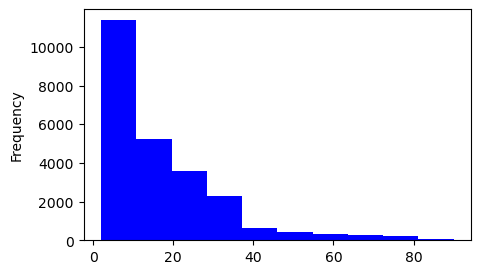

In [11]:
# visualize 'Days_Between' column distribution
sms_eligible_not_receive_df.Days_Between.plot(kind='hist', figsize=(5,3), color='blue')

## GENDER %'s and Pie Graph

In [24]:
# calculate percent each gender of 'SMS-Eligible Did-Receive SMS' rows with column_percentage_calculator already defined
sms_eligible_not_receive_SMS_male_percent = column_percentage_calculator(sms_eligible_not_receive_df, 'Gender', 'M')
sms_eligible_not_receive_SMS_female_percent = column_percentage_calculator(sms_eligible_not_receive_df, 'Gender', 'F')
print('{}% of SMS-eligible appointments THAT DID NOT RECEIVE SMS REMINDER were for male patients.'.format(round(sms_eligible_not_receive_SMS_male_percent, 2)))
print('{}% of SMS-eligible appointments THAT DID NOT RECEIVE SMS REMINDER were for female patients.'.format(round(sms_eligible_not_receive_SMS_female_percent, 2)))

35.09% of SMS-eligible appointments THAT DID NOT RECEIVE SMS REMINDER were for male patients.
64.91% of SMS-eligible appointments THAT DID NOT RECEIVE SMS REMINDER were for female patients.


Text(0.5, 1.0, 'SMS Eligible No SMS Reminder Gender Percentage')

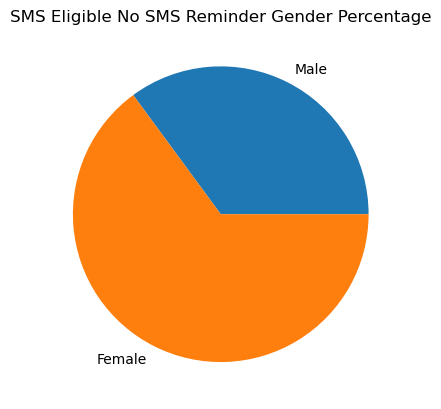

In [25]:
# visualize gender binary distribution
gender_percents = [sms_eligible_not_receive_SMS_male_percent, sms_eligible_not_receive_SMS_female_percent ]
labels = ['Male', 'Female']

fig, ax = plt.subplots()
ax.pie(gender_percents, labels = labels)
ax.set_title('SMS Eligible No SMS Reminder Gender Percentage')

# INTERVAL GROUP %'s and Bar Graph

In [14]:
# obtain percentages of Interval Groups using the column_percentage_calculator function defined earlier 
two_to_thirty_percentage = column_percentage_calculator(sms_eligible_not_receive_df, 'Interval Group', '2 - 30')
num_thirtyone_to_sixty_percentage = column_percentage_calculator(sms_eligible_not_receive_df, 'Interval Group', '31 - 60')
num_sixtyone_to_ninety_percentage = column_percentage_calculator(sms_eligible_not_receive_df, 'Interval Group', '61 - 90')

print('Percentage of SMS-Eligible appointments THAT DID NOT RECEIVE SMS REMINDER scheduled between 2 and 30 days out ---> {}%'.format(round(two_to_thirty_percentage,2)))
print('Percentage of SMS-Eligible appointments THAT DID NOT RECEIVE SMS REMINDER scheduled between 31 and 60 days out ---> {}%'.format(round(num_thirtyone_to_sixty_percentage, 2)))
print('Percentage of SMS-Eligible appointments THAT DID NOT RECEIVE SMS REMINDER scheduled between 61 and 90 days out ---> {}%'.format(round(num_sixtyone_to_ninety_percentage, 2)))

Percentage of SMS-Eligible appointments THAT DID NOT RECEIVE SMS REMINDER scheduled between 2 and 30 days out ---> 85.35%
Percentage of SMS-Eligible appointments THAT DID NOT RECEIVE SMS REMINDER scheduled between 31 and 60 days out ---> 11.99%
Percentage of SMS-Eligible appointments THAT DID NOT RECEIVE SMS REMINDER scheduled between 61 and 90 days out ---> 2.66%


<AxesSubplot:>

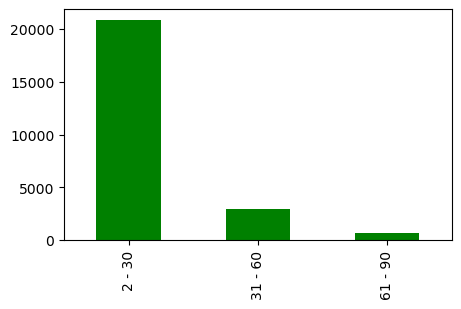

In [15]:
# visualize Interval Group categorical distribution in a bar plot
sms_eligible_not_receive_df['Interval Group'].value_counts().plot(kind='bar', figsize =(5,3), color='green')

# AGE BRACKETS %'s and Bar Graph

In [16]:
# calculate percentage for age group categorical column values
sms_eligible_youth_percentage = column_percentage_calculator(sms_eligible_not_receive_df, 'Age Group', 'Youth')
sms_eligible_young_adult_percentage = column_percentage_calculator(sms_eligible_not_receive_df, 'Age Group', 'Young Adult')
sms_eligible_adult_percentage = column_percentage_calculator(sms_eligible_not_receive_df, 'Age Group', 'Adult')
sms_eligible_older_adult_percentage = column_percentage_calculator(sms_eligible_not_receive_df, 'Age Group', 'Older Adult and Seniors')

print('Percentage of SMS-Eligible appointments THAT DID NOT RECEIVE SMS REMINDER for Youths {}%'.format(round(sms_eligible_youth_percentage, 2)))
print('Percentage of SMS-Eligible appointments THAT DID NOT RECEIVE SMS REMINDER for Young Adults {}%'.format(round(sms_eligible_young_adult_percentage, 2)))
print('Percentage of SMS-Eligible appointments THAT DID NOT RECEIVE SMS REMINDER for Adults {}%'.format(round(sms_eligible_adult_percentage, 2)))
print('Percentage of SMS-Eligible appointments THAT DID NOT RECEIVE SMS REMINDER for Older Adults and Seniors {}%'.format(round(sms_eligible_older_adult_percentage, 2)))

Percentage of SMS-Eligible appointments THAT DID NOT RECEIVE SMS REMINDER for Youths 26.11%
Percentage of SMS-Eligible appointments THAT DID NOT RECEIVE SMS REMINDER for Young Adults 22.8%
Percentage of SMS-Eligible appointments THAT DID NOT RECEIVE SMS REMINDER for Adults 25.14%
Percentage of SMS-Eligible appointments THAT DID NOT RECEIVE SMS REMINDER for Older Adults and Seniors 25.94%


<AxesSubplot:>

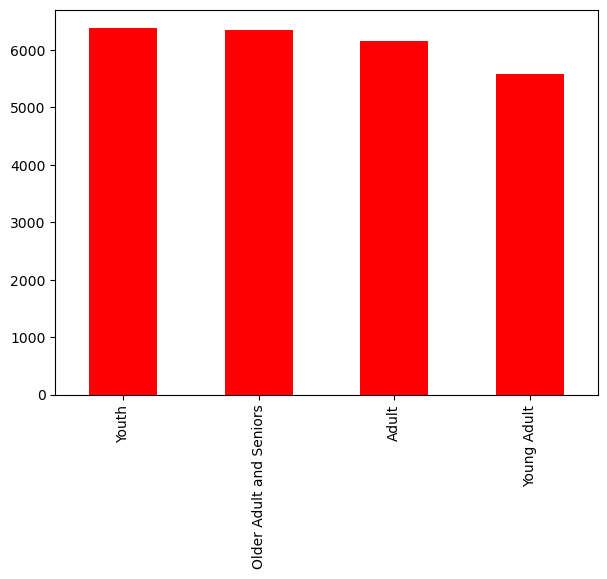

In [17]:
# create basic viz for age brackets/buckets
sms_eligible_not_receive_df['Age Group'].value_counts().plot(kind='bar', figsize=(7,5), color='red')

# CONDITIONS %'s and Bar Graph

__As each 'condition' is it's own column and the values are only binary (0 for no, 1 for yes), the percentages for these variables WRT to all SMS-ELIGIBLE THAT DID NOT RECEIVE SMS REMINDER rows was obtained from the .describe() command and its output above. These values and respective labels will be used to visualize these variables on a bar graph.__

[Text(0, 0, 'Handicap'),
 Text(1, 0, 'Alcoholism'),
 Text(2, 0, 'Diabetes'),
 Text(3, 0, 'Scholarship Program'),
 Text(4, 0, 'Hypertension')]

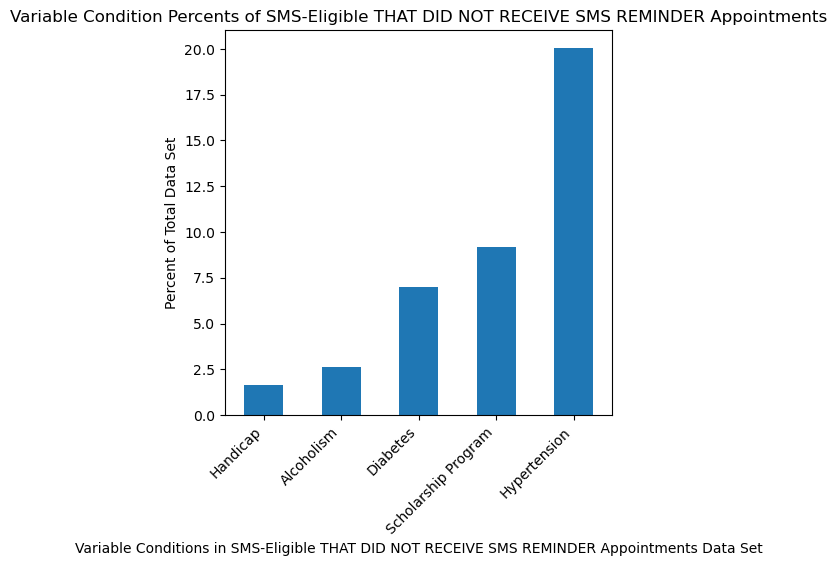

In [18]:
# create pandas series to graph and list of respective labels
condition_percents = pd.Series([1.65,  2.63, 7.00, 9.20, 20.02])
labels = ['Handicap', 'Alcoholism', 'Diabetes', 'Scholarship Program', 'Hypertension']


# plot graph of variable condition percentages
plt.figure(figsize=(5,5))
ax = condition_percents.plot(kind='bar')
ax.set_title('Variable Condition Percents of SMS-Eligible THAT DID NOT RECEIVE SMS REMINDER Appointments')
ax.set_xlabel('Variable Conditions in SMS-Eligible THAT DID NOT RECEIVE SMS REMINDER Appointments Data Set')
ax.set_ylabel('Percent of Total Data Set')
ax.set_xticklabels(labels, rotation=45, ha='right')

# These are descriptive statistics of ROWS THAT DID NOT RECEIVE SMS REMINDER.

- __32.70% of SMS-Eligible that DID NOT RECEIVE A REMINDER were NO-SHOW.__
- __67.30% of SMS-Eligible that DID NOT RECEIVE A REMINDER PRESENTED at their appointments.__
- __The average age is 38 (37.58 rounded).__
- __The median age is 37.__
- __The average time between the ScheduledDay and AppointmentDay is 16 (16.34 rounded) days.__
- __Approximately 9.20% of SMS-Eligible appointments that DID NOT RECEIVE A REMINDER are for patients enrolled in the 'scholarship' program (explained earlier in analysis).__
- __Approximately 20.02% of SMS-Eligible appointments that DID NOT RECEIVE A REMINDER are for patients suffering from hipertension (hypertension).__
- __Approximately 7.00% of SMS-Eligible appointments that DID NOT RECEIVE A REMINDER are for patients suffering from diabetes.__
- __Approximately 2.63% of SMS-Eligible appointments that DID NOT RECEIVE A REMINDER are for patients suffering from alcoholism.__
- __Approximately 1.65% of SMS-Eligible appointments that DID NOT RECEIVE A REMINDER are for patients identifying as handicapped.__
- __Approximately 35.09% of SMS-Eligible appointments that DID NOT RECEIVE A REMINDER were for male patients.__
- __Approximately 64.91% of SMS-Eligible appointments that DID NOT RECEIVE A REMINDER were for female patients.__
- __Approximately 26.11% of SMS-Eligible appointments that DID NOT RECEIVE A REMINDER were for Youths.__
- __Approximately 22.80% of SMS-Eligible appointments that DID NOT RECEIVE A REMINDER were for Young Adults.__ 
- __Approximately 24.14% of SMS-Eligible appointments that DID NOT RECEIVE A REMINDER were for Adults.__
- __Approximately 25.94% of SMS-Eligible appointments that DID NOT RECEIVE A REMINDER were for Older Adults and Seniors.__ 
- __Approximately 85.35% of SMS-Eligible appointments that DID NOT RECEIVE A REMINDER were scheduled between 2 and 30 days out.__
- __Approximately 11.99% of SMS-Eligible appointments that DID NOT RECEIVE A REMINDER were scheduled between 31 and 60 days out.__
- __Approximately 2.66% of SMS-Eligible appointments that DID NOT RECEIVE A REMINDER were scheduled between 61 and 90 days out.__

# We need to split this part of the data one more time to glean some deeper insights. From this point, now that we have gathered the statistical information we sought out to find from this population, SMS-ELIGIBLE ROWS THAT _DID NOT_ RECIEVE A REMINDER, we can split this population into 2 new DFs/csvs for further analysis. 

# The first new DF/csv (1 of 2) will be for SMS-ELIGIBLE _DID NOT_ RECEIVE SMS REMINDER PRESENTED AT APPOINTMENT rows.

# The second new DF/csv (2 of 2) will be for SMS-ELIGIBLE _DID NOT_ RECEIVE SMS REMINDER NO SHOW rows.

In [19]:
# filter out only rows that PRESENTED AT APPOINTMENT into new df
sms_not_received_appointment_presented_df = sms_eligible_not_receive_df.loc[(sms_eligible_not_receive_df['No-show'] == 0)]

# visually inspect new df
sms_not_received_appointment_presented_df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_Between,Day_Num,Age Group,Interval Group
0,M,62,0,0,0,0,0,0,0,22,4,Older Adult and Seniors,2 - 30
1,F,60,0,0,0,0,0,0,0,10,4,Older Adult and Seniors,2 - 30
3,F,69,0,1,0,0,0,0,0,2,4,Older Adult and Seniors,2 - 30
4,M,2,0,0,0,0,0,0,0,10,4,Youth,2 - 30
5,M,1,0,0,0,0,0,0,0,10,4,Youth,2 - 30


In [20]:
# filter out only rows that NO-SHOW AT APPOINTMENT into new df
sms_not_received_appointment_no_show_df = sms_eligible_not_receive_df.loc[(sms_eligible_not_receive_df['No-show'] == 1)]

# visually inspect new df
sms_not_received_appointment_no_show_df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_Between,Day_Num,Age Group,Interval Group
2,M,28,0,0,0,0,0,0,1,10,4,Young Adult,2 - 30
16,F,57,0,0,0,0,0,0,1,41,4,Older Adult and Seniors,31 - 60
22,M,43,0,0,0,0,0,0,1,28,4,Adult,2 - 30
25,F,22,0,0,0,0,0,0,1,44,4,Young Adult,31 - 60
31,M,58,0,0,0,0,0,0,1,41,4,Older Adult and Seniors,31 - 60


In [21]:
# # saving new filtered DFs to csv
# sms_not_received_appointment_presented_df.to_csv(os.path.join('SMS_Eligible_No_SMS_Reminder_Presented','sms_not_received_appointment_presented.csv'), index=False)
# sms_not_received_appointment_no_show_df.to_csv(os.path.join('SMS_Eligible_No_SMS_Reminder_No_Show', 'sms_not_received_appointment_no_show.csv'), index=False)

In [22]:
1==1

True

# This is the end of this section of EDA for ROWS THAT DID NOT RECEIVE SMS REMINDER AND WERE ELIGIBLE 